<a href="https://colab.research.google.com/github/pheb2014939/App_VT/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Accuracy: 92.11%
Precision: 92.58%
Recall: 99.08%
F1 Score: 95.72%
Confusion Matrix:
[[ 3045  5542]
 [  643 69177]]
              precision    recall  f1-score   support

           0       0.83      0.35      0.50      8587
           1       0.93      0.99      0.96     69820

    accuracy                           0.92     78407
   macro avg       0.88      0.67      0.73     78407
weighted avg       0.91      0.92      0.91     78407



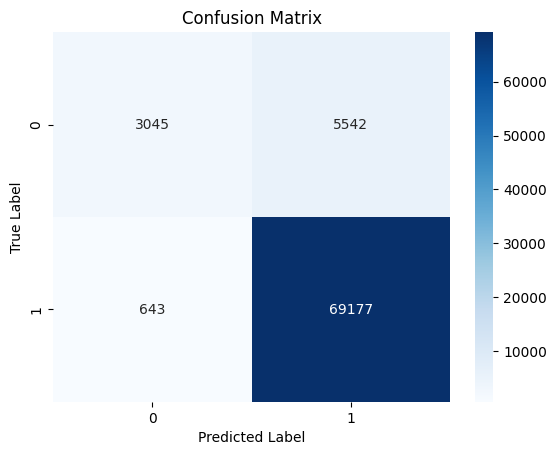

In [1]:
#=========================================================================
!pip install -U imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets using the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(random_state=42, C=10, kernel="rbf", gamma="scale")
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#==============================================================